In [1]:
import numpy as np

In [2]:
x0 = 0.1346

# Pontos iniciais:

l = [0.1778, 0.2388, 0.3124] # Convertido para metro
F = [8.89, 17.79, 26.69] # Em Newtons

In [3]:
### Funções utilizadas

def solucao_direta(A, B): ## Para resolver sistemas lineares
    n = len(A)

    # # Criando um sistema triangular com o método da Eliminação de Gauss
    for k in range(0, n-1):
        for i in range(k+1, n):
            m = (A[i][k])/(A[k][k])

            for j in range(k, n):
                A[i][j] = A[i][j] - m*A[k][j]
            B[i] = B[i] - m*B[k]


    # Resolvendo o sistema triangular pelo método da substituição retroativa
    x = []

    for i in range(0, n):
        x.append(0)

    x[n-1] = B[n-1]/A[n-1][n-1]

    c = 1
    
    for i in range(n-2, -1, -1):
        soma = 0
        c += 1
        for j in range(n-1, i, -1):
            soma += (A[i][j]*x[j])
        x[n-c] = (B[i] - soma)/(A[i][i])

    return x


## Vamos considerar nesse caso: g1(x) = 1.0; g2(x) = x;
def funcgs2(xc): ## Forma uma matriz com os valores de g1(x) e g2(x)

    m = len(xc)

    g1 = np.array([1.0]*m)
    g2 = np.copy(xc)

    gm = [g1, g2]

    return gm


def montarMatriz(gs, xc, fx): # Monta o sistema linear do método de mínimos quadrados
    n = len(gs)
    m = len(xc)
    A = np.zeros((n, n))
    B = np.array([0.0]*n)

    for i in range(0, n):
        for j in range(0, n):
            for k in range(0, m):
                A[i][j] += gs[j][k]*gs[i][k]
    
    for i in range(0, n):
        soma = 0
        for k in range(0, m):
            soma += fx[k]*gs[i][k]
        B[i] = soma

    return A, B

Sendo nossa função de ajuste: Phi(x) = a1 + a2x², uma reta, "a2" é o coeficiente angular desta reta. Quando comparamos com a função teórica F(l) = k(l - x0), percebemos que esta é uma função linear, e que "k" representa o coeficiente angular da reta formada em seu gráfico. Ou seja, espera-se que "a2" seja aproximadamente o valor de "k".

In [4]:
## Vamos obter os coeficientes a1 e a2 da função de ajuste pelo método de mínimos quadrados:

gs = funcgs2(l) # Obtendo os g(x)
A, B = montarMatriz(gs, l, F) # montando o sistema linear
a = solucao_direta(A, B) # Resolvendo o sistema linear e obtendo os coeficientes

print(a)

[-14.251622271338348, 131.8585278655899]


In [5]:
# Portanto:
k = a[1]
print(f'O valor de k é aproximadamente: {k:.3f}')

O valor de k é aproximadamente: 131.859


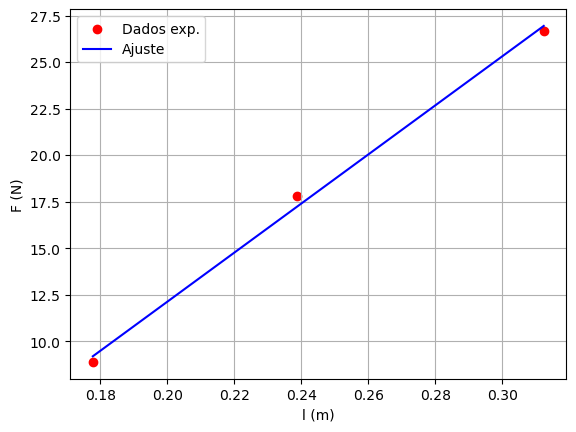

In [6]:
## Gráfico da letra A:
import matplotlib.pyplot as plt

xm = np.linspace(l[0], l[-1], 100) # malha de 100 pontos entre o primeiro l e o último l

fi = [] ## Obtendo todos os phis

for i in range(0, len(xm)):
    fi.append(a[0]*1.0 + a[1]*xm[i]) 

plt.xlabel('l (m)')
plt.ylabel('F (N)')
plt.scatter(l, F, color='red', label='Dados exp.')
plt.plot(xm, fi, color='blue', label='Ajuste')
plt.legend()
plt.grid()
plt.show()

Letra B

In [7]:
# Novos pontos foram adicionados
l2 = [0.1778, 0.2108, 0.2388, 0.2870, 0.3124, 0.3658, 0.4039]
F2 = [8.89, 13.34, 17.79, 22.24, 26.69, 35.59, 44.48]

# Recalculando...
gs2 = funcgs2(l2)
A, B = montarMatriz(gs2, l2, F2)
ab = solucao_direta(A, B)

print(ab) # Novos valores de a1 e a2

[-19.032725726476283, 151.38947161799848]


In [8]:
# Ou seja:
k = ab[1]
print(f'O valor de k é aproximadamente: {k:.3f}')

O valor de k é aproximadamente: 151.389


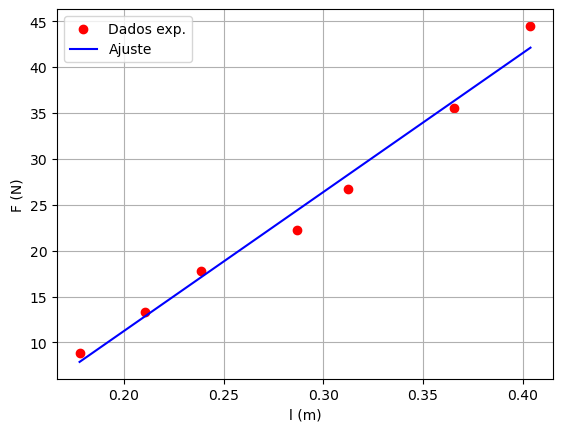

In [9]:
### Gráfico da letra B:
import matplotlib.pyplot as plt

xm2 = np.linspace(l2[0], l2[-1], 100) # malha de 100 pontos entre o primeiro l e o último l

fi2 = [] ## Obtendo todos os phis

for i in range(0, len(xm2)):
    fi2.append(ab[0]*1.0 + ab[1]*xm2[i]) 
 
plt.xlabel('l (m)')
plt.ylabel('F (N)')
plt.scatter(l2, F2, color='red', label='Dados exp.')
plt.plot(xm2, fi2, color='blue', label='Ajuste')
plt.legend()
plt.grid()
plt.show()

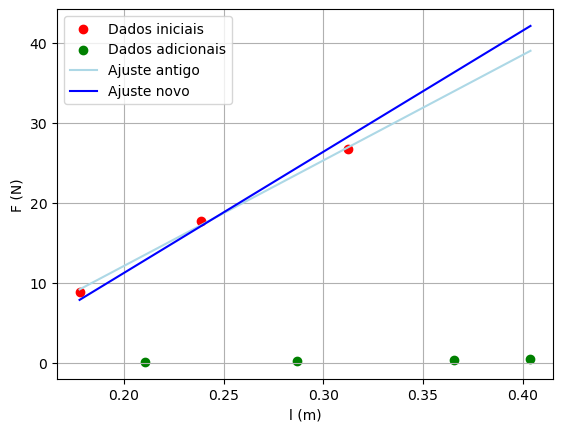

In [10]:
### Gráfico de sobreposição:
import matplotlib.pyplot as plt

fi = []

for i in range(0, len(xm2)):
    fi.append(a[0]*1.0 + a[1]*xm2[i]) 

ln = [0.2108, 0.2870, 0.3658, 0.4039]
Fn = [0.1334, 0.2224, 0.3559, 0.4448]
 
plt.xlabel('l (m)')
plt.ylabel('F (N)') 
plt.scatter(l, F, color='red', label='Dados iniciais')
plt.scatter(ln, Fn, color='green', label='Dados adicionais')
plt.plot(xm2, fi, color='lightblue', label='Ajuste antigo')
plt.plot(xm2, fi2, color='blue', label='Ajuste novo')
plt.legend()
plt.grid()
plt.show()

Conclusão: A princípio, o ajuste da letra A parece se encaixar melhor nos poucos pontos daquela amostra, do que o ajuste da letra B, com a adição de mais pontos. Apesar disso, um experimento com mais dados, se bem feito, deve apresentar um resultado final que se aproxima mais da realidade, então o valor de "k" obtido na letra B deve ser o mais condizente com a realidade.